# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [159]:
theta = np.pi/4    # Ángulo de lanzamiento en [rad].
v0 = 55     # Velocidad inicial de la bola dada en [m/s].
v0x = v0*np.cos(theta)    # Velocidad inicial horizontal de la bola dada en [m/s].
v0y = v0*np.sin(theta)    # Velocidad inicial vertical de la bola dada en [m/s].
b = 0.005   # Coeficiente de rozamiento con el aire. 
g = 9.8   # Gravedad dada en [m/s^2]


y = lambda R, v0x, v0y, b, g: (g/b + v0y)*(R/v0x) + (g/b**2)*np.log(1-(R*b/v0x))  # Definición de la función trayectoria parametrizada.
params_y = (v0x, v0y, b, g)    # Parámetros asociados a la función altura parametrizada.

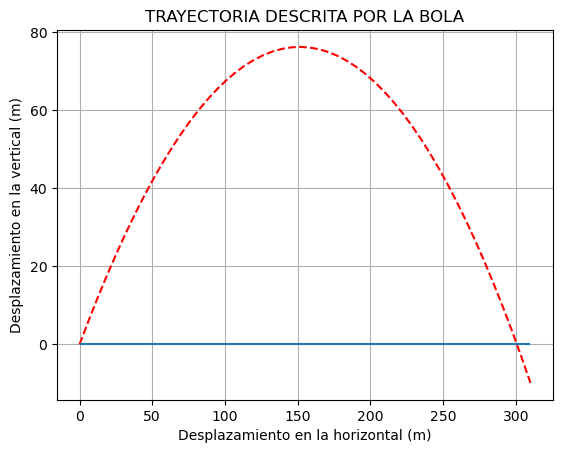

In [196]:
# Gráfica preliminar de la trayectoria de la bola, usada para visualizar ubicación de las raíces de la función altura. 

X = np.linspace(0, 310, 50)
Y = y(X, *params_y)

plt.plot(X, Y, 'r--')
plt.title('TRAYECTORIA DESCRITA POR LA BOLA')
plt.ylabel('Desplazamiento en la vertical (m)')
plt.xlabel('Desplazamiento en la horizontal (m)')
plt.hlines(0, 0, 310)
plt.grid()
plt.show()

In [198]:
# Determinación del desplazamiento horizontal máximo por dos métodos numéricos diferentes.

R1 = optimize.bisect(y, 295, 305, args = params_y)
R2 = optimize.newton(y, 299, args = params_y)

print('La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la bisección es: ', R1)
print('La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la secante es: ', R2)

La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la bisección es:  300.69207669317507
La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la secante es:  300.6920766931835


In [199]:
# Determinación del tiempo de vuelo, de acuerdo con el desplazamiento horizontal máximo. 

tv = lambda R, v0x, b: (-1/b)*np.log(1-(R*b/(v0x)))
params_tv = (v0x, b)

tv1 = tv(R1, *params_tv)
tv2 = tv(R2, *params_tv)

print('De acuerdo con el método de la bisección, el tiempo de vuelo para el primer lanzamiento es: ', tv1)
print('De acuerdo con el método de la secante, el tiempo de vuelo para el primer lanzamiento es: ', tv2)

De acuerdo con el método de la bisección, el tiempo de vuelo para el primer lanzamiento es:  7.885101833163787
De acuerdo con el método de la secante, el tiempo de vuelo para el primer lanzamiento es:  7.885101833164018


In [146]:
x_ = lambda t: (v0x/b)*(1-np.exp(-b*t))   # Definición de la función desplazamiento horizontal.
y_ = lambda t: (1/b)*((g/b)+v0y)*(1-np.exp(-b*t))-(g/b)*t   # Definición de la función desplazamiento vertical. 

t_ = np.linspace(0, tv2, 100)
X_ = x_(t_)                     # Creación del conjunto de datos de desplazamiento para graficar.
Y_ = y_(t_)

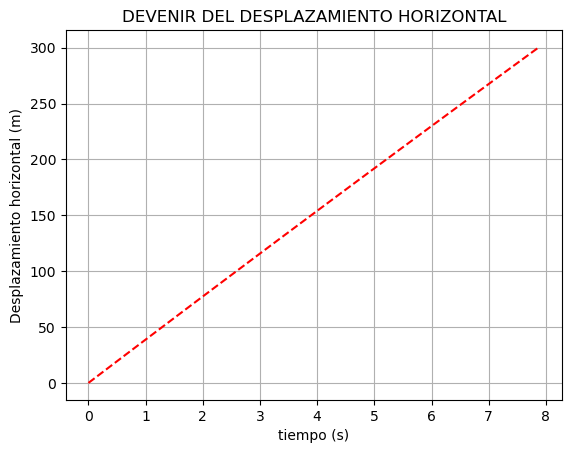

In [202]:
# Gráfica del desplazamiento horizontal en función del tiempo (x vs t).

plt.plot(t_, X_, 'r--')
plt.title('DEVENIR DEL DESPLAZAMIENTO HORIZONTAL')
plt.ylabel('Desplazamiento horizontal (m)')
plt.xlabel('tiempo (s)')
plt.grid()
plt.show()

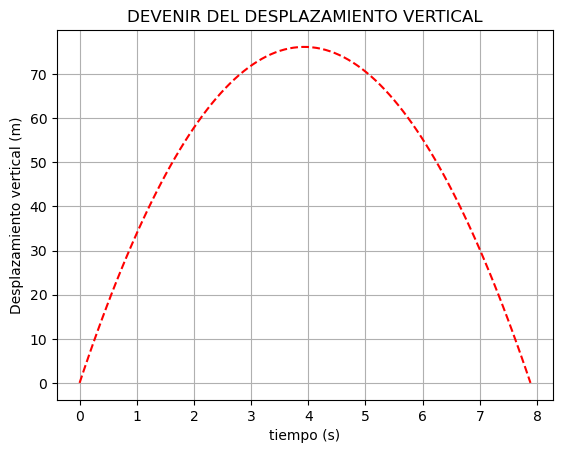

In [203]:
# Gráfica del desplazamiento vertical en función del tiempo (y vs t).

plt.plot(t_, Y_, 'r--')
plt.title('DEVENIR DEL DESPLAZAMIENTO VERTICAL')
plt.ylabel('Desplazamiento vertical (m)')
plt.xlabel('tiempo (s)')
plt.grid()
plt.show()

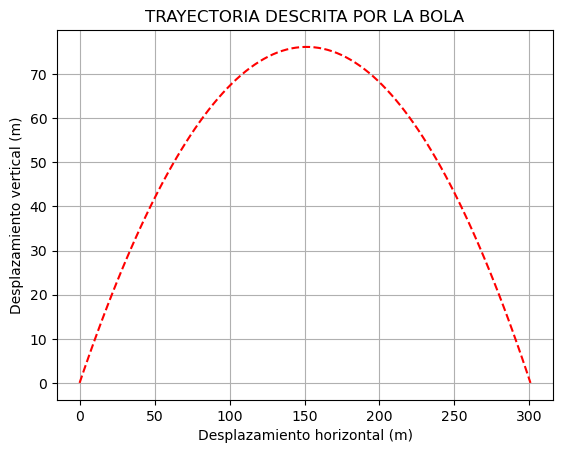

In [205]:
# Trayectoria recorrida por la bola (x vs y).

plt.plot(X_, Y_, 'r--')
plt.title('TRAYECTORIA DESCRITA POR LA BOLA')
plt.ylabel('Desplazamiento vertical (m)')
plt.xlabel('Desplazamiento horizontal (m)')
plt.grid()
plt.show()

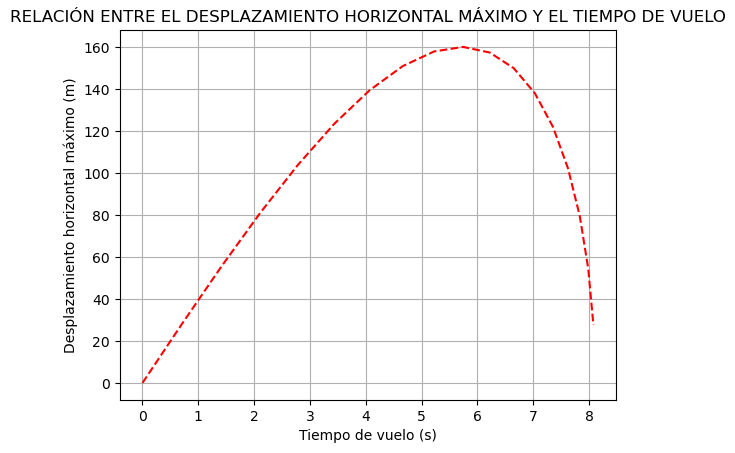

In [209]:
thetas=np.arange(0, 90, 5)
thetas=np.deg2rad(thetas)      # Arreglo de numpy con diferentes valores para el ángulo de lanzamiento.

v0s = 40     # Velocidad inicial de la bola dada en [m/s].
v0xs = v0s * np.cos(thetas)    # Velocidad inicial horizontal de la bola dada en [m/s]. 
v0ys = v0s * np.sin(thetas)    # Velocidad inicial vertical de la bola dada en [m/s].

Rs = np.zeros(len(v0xs))
tvs = np.zeros(len(v0xs))      # Inicialización de arreglos de ceros en numpy.


for i in range(len(v0xs)):                  # Ciclo para obtener un arreglo con distintos valores de alcance máximo (Rs) y
    params_ys = (v0xs[i], v0ys[i], b, g)    # tiempo de vuelo (tvs), según diferentes ángulos de lanzamiento. 
    params_tvs = (v0xs[i], b)
    
    Rs[i] = optimize.newton(y, 100, args = params_ys)   
    tvs[i] = tv(Rs[i], *params_tvs)
    

plt.plot(tvs, Rs, 'r--')
plt.title('RELACIÓN ENTRE EL DESPLAZAMIENTO HORIZONTAL MÁXIMO Y EL TIEMPO DE VUELO')
plt.ylabel('Desplazamiento horizontal máximo (m)')
plt.xlabel('Tiempo de vuelo (s)')
plt.grid()
plt.show()

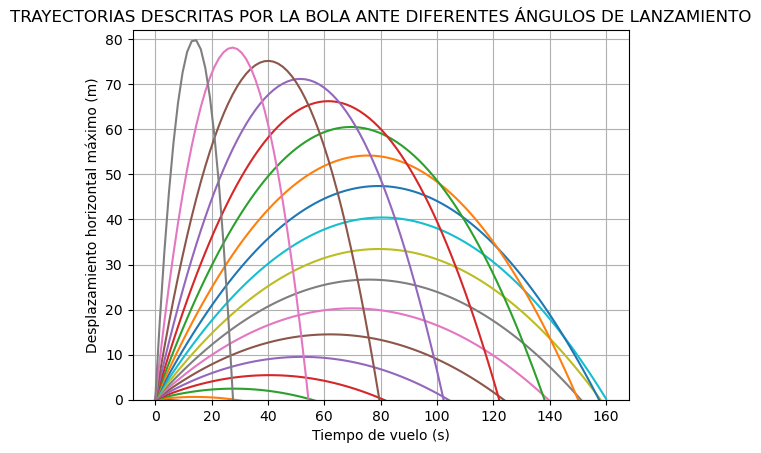

In [210]:
for j in range(len(v0xs)):
    
    params_ys = (v0xs[j], v0ys[j], b, g)
    
    xs_ = np.linspace(0,160,100)
    ys_ = y(xs_, *params_ys)

    plt.plot(xs_,ys_)

plt.ylim(0,82)
plt.title('TRAYECTORIAS DESCRITAS POR LA BOLA ANTE DIFERENTES ÁNGULOS DE LANZAMIENTO')
plt.ylabel('Desplazamiento horizontal máximo (m)')
plt.xlabel('Tiempo de vuelo (s)')
plt.grid()
plt.show()    